In [1]:
import pandas as pd
import numpy as np

from main import set_ab_test 
from main import validate_ab_test_data
from main import test_hypothesis_relational
from main import test_hypothesis_continuous
from main import print_statistical_report
from main import save_report_to_html

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
EXPERIMENT_NAME = 'ab_price_discount'

exp_df = pd.DataFrame({
    'user_id': [1, 1, 2, 3, 3, 4, 5, 6],
    'dt': ['2021-01-01', '2021-01-02', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-02', '2021-01-05', '2021-01-01'],
    'group': [2, 1, 1, 2, 2, 2, 1, 1],
    'payment': [np.nan, 100, np.nan, 110, np.nan, 50, np.nan, 130]
})

In [4]:
exp_df.describe()

,user_id,group,payment
count,8.000000,8.000000,4.000000
mean,3.125000,1.500000,97.500000
std,1.807722,0.534522,34.034296
min,1.000000,1.000000,50.000000
25%,1.750000,1.000000,87.500000
50%,3.000000,1.500000,105.000000
75%,4.250000,2.000000,115.000000
max,6.000000,2.000000,130.000000


In [19]:
m = set_ab_test(
    ab_test_name=EXPERIMENT_NAME, 
    dataframe=exp_df, 
    group_col='group', 
    date_col='dt', 
    uniq_id_col='user_id',
    control_group_name='A'
)

C:\Imp\python391\lib\site-packages\numpy\lib\arraysetops.py:602: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


1

2

1

2

{'1-2': {'control': 1, 'test': 2}}

In [20]:
validate_ab_test_data(EXPERIMENT_NAME)

group                   1           2
user_id count    4.000000    4.000000
        mean     3.500000    2.750000
        std      2.380476    1.258306
        min      1.000000    1.000000
        25%      1.750000    2.500000
        50%      3.500000    3.000000
        75%      5.250000    3.250000
        max      6.000000    4.000000
payment count    4.000000    4.000000
        mean    57.500000   40.000000
        std     67.515430   52.281290
        min      0.000000    0.000000
        25%      0.000000    0.000000
        50%     50.000000   25.000000
        75%    107.500000   65.000000
        max    130.000000  110.000000

,group,user_id
0,1,5
1,2,1


'test_hypothesis_relational'

{'ab_price_discount': ab_price_discount}

,group,dt,payment,user_id,metric
0,1,2021-01-01,1.0,1,1.0
1,1,2021-01-02,1.0,1,1.0
2,1,2021-01-05,0.0,1,0.0
3,2,2021-01-01,0.0,1,0.0
4,2,2021-01-02,1.0,1,1.0
5,2,2021-01-03,0.0,1,0.0


,group,payment,user_id,metric
0,1,2.0,3,2.0
1,2,1.0,3,1.0


'here1'

{'1-2': {'control': 1, 'test': 2}}

'here'

'group'

1

0    1
1    2
Name: group, dtype: int64

{'1-2': 0.4142161782425251}

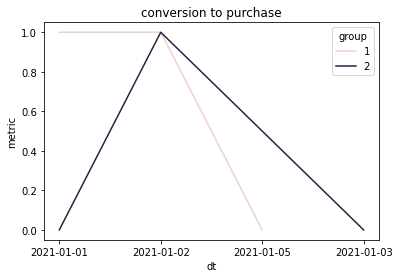

In [24]:
test_hypothesis_relational(
    EXPERIMENT_NAME,
    nominator='payment',
    denominator='user_id',
    stat_test='chisquare', # ztest
    description='conversion to purchase',
    uniq_id_rel=True
)

'test_hypothesis_continuous'

{'1-2': {'control': 1, 'test': 2}}


,group,dt,metric
0,1,2021-01-01,65.0
1,1,2021-01-02,100.0
2,1,2021-01-05,0.0
3,2,2021-01-01,0.0
4,2,2021-01-02,80.0
5,2,2021-01-03,0.0


,group,dt,user_id,payment
0,1,2021-01-01,2,0.0
1,1,2021-01-01,6,130.0
2,1,2021-01-02,1,100.0
3,1,2021-01-05,5,0.0
4,2,2021-01-01,1,0.0
5,2,2021-01-02,3,110.0
6,2,2021-01-02,4,50.0
7,2,2021-01-03,3,0.0


'here1'

{'1-2': {'control': 1, 'test': 2}}

'here'

'group'

1

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
Name: group, dtype: int64

{'1-2': 0.696127879187886}

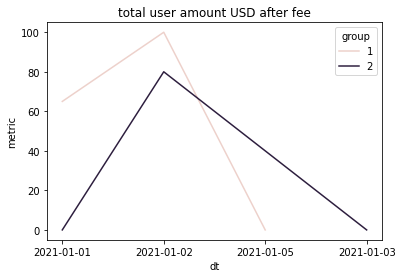

In [25]:
test_hypothesis_continuous(
    EXPERIMENT_NAME,
    value='payment',
    stat_test='ttest_welsh', # ttest, ftest, ztest
    description='total user amount USD after fee'
)

In [26]:
m._hypothesis

{'conversion to purchasepaymentuser_id': <ab_hypothesis.Hypothesis at 0x19b49e04b50>,
 'total user amount USD after feepayment': <ab_hypothesis.Hypothesis at 0x19b49d13a00>}

In [11]:
print_statistical_report(EXPERIMENT_NAME)

'print_statistical_report'

In [12]:
save_report_to_html(EXPERIMENT_NAME)

'save_report_to_html'